# Question 1 : Data - Import & Manipulation

## a) Importing and cleaning

### 1) Import BlaBlaCar.xlsx to Jupyter Notebook

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_excel('C:/Users/Utilisateur/OneDrive/Documents/RENNES SB/COURS/PROGRAMMING/MOCK/BlaBla-Car_Data.xlsx')

In [55]:
df.head()

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,min_price_depd,mean_price_depd,sd_price_depd,seats_in_car,seat_sold,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender
0,123956,427719,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28,526.0,0,...,20,29.071247,2.567809,4,0,Francois,Excellent,0,25,0
1,81617,280534,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30,526.0,0,...,20,28.862133,3.189145,0,0,Corinne,Good,24,31,1
2,198167,657605,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31,526.0,1,...,20,28.862133,3.189145,0,0,Laura,Excellent,1,31,1
3,282817,946022,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25,526.0,1,...,20,28.862133,3.189145,3,3,Philippe,VeryGood,3,31,0
4,29640,94886,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25,526.0,1,...,18,29.364803,2.784098,7,4,Antoine,VeryGood,10,26,0


### 2) Write a Python code to display a summary of the basic information about the Data Frame and its data. Please indicate any information you consider relevant to data analysis.

In [56]:
# Information Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97625 entries, 0 to 97624
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_id           97625 non-null  int64  
 1   offer_id            97625 non-null  int64  
 2   departure           97625 non-null  object 
 3   arrival             97625 non-null  object 
 4   trip_distance       97601 non-null  float64
 5   offer_date          97625 non-null  object 
 6   departure_date      97625 non-null  object 
 7   price               97625 non-null  int64  
 8   nb_offers           97603 non-null  float64
 9   photo               97625 non-null  int64  
 10  driver_status       97625 non-null  object 
 11  music               97625 non-null  int64  
 12  talk                97625 non-null  int64  
 13  pet                 97625 non-null  int64  
 14  smoking             97625 non-null  int64  
 15  manual_reservation  97625 non-null  int64  
 16  roun

In [57]:
# Shape of the data
df.shape

(97625, 31)

### 3) Clean data-frame (quantitative variables and categorical variables)

In [58]:
df.isnull().sum()

driver_id              0
offer_id               0
departure              0
arrival                0
trip_distance         24
offer_date             0
departure_date         0
price                  0
nb_offers             22
photo                  0
driver_status          0
music                  0
talk                   0
pet                    0
smoking                0
manual_reservation     0
round_trip             0
car_rating             0
detour_time            0
page_view              0
max_price_depd         0
min_price_depd         0
mean_price_depd        0
sd_price_depd         12
seats_in_car           0
seat_sold              0
Driver_first_name      0
Satisfaction_Livel     5
nb_evaluation          0
driver_age             0
driver_gender          0
dtype: int64

In [59]:
cat_cols = df.select_dtypes(include = "object").columns
cat_cols

Index(['departure', 'arrival', 'offer_date', 'departure_date', 'driver_status',
       'Driver_first_name', 'Satisfaction_Livel'],
      dtype='object')

In [60]:
for col in cat_cols :
    df[col] = df[col].fillna(df[col].mode().iloc[0])

In [61]:
num_cols = df.select_dtypes(include = ["int",'float']).columns
num_cols

Index(['driver_id', 'offer_id', 'trip_distance', 'price', 'nb_offers', 'photo',
       'music', 'talk', 'pet', 'smoking', 'manual_reservation', 'round_trip',
       'car_rating', 'detour_time', 'page_view', 'max_price_depd',
       'min_price_depd', 'mean_price_depd', 'sd_price_depd', 'seats_in_car',
       'seat_sold', 'nb_evaluation', 'driver_age', 'driver_gender'],
      dtype='object')

In [62]:
driver = df.driver_status.unique()
driver

array(['S2', 'S5', 'S3', 'S4', 'S1'], dtype=object)

In [63]:
for col in num_cols :
    for d in driver :
        dfd = df.loc[(df['driver_status'] == d)]
        avrg = dfd[col].mean()
        
        df.loc[(df['driver_status'] == d) & (df[col].isnull()), col] = avrg

In [64]:
df.isnull().sum()

driver_id             0
offer_id              0
departure             0
arrival               0
trip_distance         0
offer_date            0
departure_date        0
price                 0
nb_offers             0
photo                 0
driver_status         0
music                 0
talk                  0
pet                   0
smoking               0
manual_reservation    0
round_trip            0
car_rating            0
detour_time           0
page_view             0
max_price_depd        0
min_price_depd        0
mean_price_depd       0
sd_price_depd         0
seats_in_car          0
seat_sold             0
Driver_first_name     0
Satisfaction_Livel    0
nb_evaluation         0
driver_age            0
driver_gender         0
dtype: int64

## b) Data Manipulation

### 1) Find & Print the Maximum " trip_distance" Driver name

In [65]:
df[df['trip_distance'] == df['trip_distance'].max()][['Driver_first_name','trip_distance']]

,Driver_first_name,trip_distance
94822,Claude,1700.0


## 2) Using the loop (for ... in ... ) : Select and print by ‘‘driver_status’’, the Driver_name with the max “"detour_time"

In [66]:
for d in driver :
    print(d)
    print(df[df['detour_time'] == df['detour_time'].max()][['Driver_first_name','detour_time']])
    print('***************************************')

S2
      Driver_first_name  detour_time
111              Armand         30.0
150              Marcel         30.0
404              Jerome         30.0
494                Jean         30.0
505              Marine         30.0
...                 ...          ...
97547               Sam         30.0
97570          Ambroise         30.0
97573            Fabien         30.0
97588           Quentin         30.0
97589          Thibault         30.0

[1325 rows x 2 columns]
***************************************
S5
      Driver_first_name  detour_time
111              Armand         30.0
150              Marcel         30.0
404              Jerome         30.0
494                Jean         30.0
505              Marine         30.0
...                 ...          ...
97547               Sam         30.0
97570          Ambroise         30.0
97573            Fabien         30.0
97588           Quentin         30.0
97589          Thibault         30.0

[1325 rows x 2 columns]
****************

### 3) Defining Your Own Python Function with : 
### - Argument = driver_id
### - Return = ( Driver_first_name, Driver_Age, Average trip_distance, Average Price ) 
### Using your function, print the return if the “driver_id” = ( from 282460 to 242870 )

In [67]:
def drivers(driver_id1,driver_id2) :
    for d in range(driver_id1,driver_id2) :
        
        if d in df['driver_id'].values :
            
            idd = df[df['driver_id']==d]['driver_id'].iloc[0]
            driver_name = df[df['driver_id'] == d]['Driver_first_name'].iloc[0]
            driver_age = df[df['driver_id'] == d]['driver_age'].iloc[0]
            avg_trip = df[df['driver_id']==d]['trip_distance'].mean()
            avg_price = df[df['driver_id']==d]['price'].mean()

        
            print(idd,driver_name,driver_age,avg_trip,avg_price)
        
        else : 
            "No driver ID"
            
    return None

In [68]:
print(drivers(242870,282460))

242878.0 Maurice 29.0 487.0 21.0
242879.0 Maurice 32.0 465.0 21.0
242880.0 Maurice 33.0 462.0 21.0
242882.0 Maurice 48.0 462.0 21.0
242884.0 Maurice 59.0 434.0 23.5
242900.0 Maurice 51.0 457.0 29.0
242944.0 Maurice 22.0 475.0 30.0
242945.0 Maurice 25.0 501.0 30.0
242947.0 Maurice 30.0 479.0 30.0
242955.0 Maurice 52.0 462.0 30.0
242957.0 Maurice 66.0 461.0 30.0
242959.0 Maurice 18.0 467.0 30.0
242960.0 Maurice 19.0 450.0 30.0
242962.0 Maurice 23.0 435.0 30.0
242963.0 Maurice 26.0 467.5 30.0
242967.0 Maurice 32.0 464.0 31.0
242968.0 Maurice 34.0 440.0 30.0
242969.0 Maurice 35.0 455.0 30.0
242970.0 Maurice 44.0 470.0 30.0
242973.0 Maurice 57.0 483.0 30.0
242974.0 Maurice 58.0 469.0 31.0
242975.0 Maurice 60.0 467.0 30.0
242979.0 Maurice 67.0 467.5 30.5
242981.0 Maurice 57.0 487.5 26.5
243026.0 Maurice 32.0 462.0 34.5
243041.0 Maurin 24.0 462.0 24.0
243042.0 Maurin 26.0 474.0 24.0
243043.0 Maurin 28.0 461.0 24.0
243044.0 Maurin 30.0 462.0 24.0
243045.0 Maurin 33.0 464.5 24.0
243048.0 Maurin

244019.0 Maxime 21.0 475.0 30.5
244020.0 Maxime 22.0 455.0 28.666666666666668
244021.0 Maxime 23.0 471.5 32.25
244022.0 Maxime 24.0 473.0 30.181818181818183
244023.0 Maxime 25.0 475.14285714285717 30.0
244024.0 Maxime 26.0 462.5 28.2
244025.0 Maxime 27.0 468.22222222222223 29.333333333333332
244027.0 Maxime 28.0 472.625 29.75
244028.0 Maxime 29.0 481.5 30.25
244029.0 Maxime 30.0 461.6 30.8
244030.0 Maxime 31.0 462.0 29.333333333333332
244031.0 Maxime 32.0 457.0 32.0
244032.0 Maxime 33.0 463.0 31.666666666666668
244033.0 Maxime 34.0 457.0 33.0
244035.0 Maxime 36.0 462.0 30.0
244037.0 Maxime 38.0 462.0 29.333333333333332
244038.0 Maxime 39.0 458.25 29.5
244039.0 Maxime 40.0 475.0 30.0
244040.0 Maxime 41.0 447.6666666666667 27.0
244041.0 Maxime 42.0 476.0 33.0
244042.0 Maxime 43.0 462.0 30.0
244044.0 Maxime 45.0 444.0 30.0
244045.0 Maxime 46.0 459.0 33.0
244046.0 Maxime 47.0 468.0 30.0
244048.0 Maxime 49.0 463.6 28.2
244050.0 Maxime 51.0 450.0 30.0
244051.0 Maxime 52.0 462.0 30.0
244053.0

246050.0 Mejdi 24.0 469.0 30.0
246051.0 Mejdi 25.0 462.0 30.0
246052.0 Mejdi 30.0 468.0 30.0
246055.0 Mejdi 30.0 482.0 28.0
246058.0 Mejdoub 27.0 462.0 30.0
246113.0 Mel 34.0 465.0 30.0
246135.0 Melad 36.0 488.0 26.0
246136.0 Melad 40.0 545.0 26.0
246149.0 Melaine 21.0 462.0 32.0
246151.0 Melaine 28.0 462.0 34.0
246152.0 Melaine 33.0 410.0 34.0
246153.0 Melaine 47.0 475.0 34.0
246189.0 Melania 31.0 462.0 27.0
246194.0 Melanie 21.0 465.0 30.0
246195.0 Melanie 22.0 465.0 30.0
246197.0 Melanie 24.0 477.0 30.0
246198.0 Melanie 25.0 462.0 30.0
246201.0 Melanie 27.0 463.0 30.0
246204.0 Melanie 29.0 464.0 30.0
246205.0 Melanie 30.0 467.0 30.0
246207.0 Melanie 32.0 457.0 20.0
246209.0 Melanie 34.0 464.0 30.0
246211.0 Melanie 36.0 461.0 30.0
246212.0 Melanie 37.0 483.0 30.0
246223.0 Melanie 48.0 462.0 30.0
246224.0 Melanie 49.0 468.48669472783047 30.0
246228.0 Melanie 53.0 459.0 30.0
246241.0 Melanie 20.0 462.0 30.0
246243.0 Melanie 22.0 462.0 30.0
246246.0 Melanie 24.0 481.0 30.0
246247.0 Mela

248408.0 Meryl 28.0 472.0 28.0
248443.0 Meryl 23.0 495.0 32.0
248475.0 Mess 27.0 462.0 30.0
248476.0 Mess 28.0 467.0 30.0
248477.0 Mess 57.0 431.0 30.0
248478.0 Mess 26.0 440.0 26.0
248479.0 Mess 27.0 465.0 26.0
248480.0 Mess 29.0 472.0 26.0
248493.0 Messaoud 27.0 462.0 30.0
248556.0 Mezin 21.0 462.0 30.0
248568.0 Mhamed 33.0 462.0 30.0
248587.0 Mhammed 23.0 461.0 26.0
248588.0 Mhammed 24.0 467.20353982300884 25.0
248589.0 Mhammed 25.0 469.0 25.0
248591.0 Mhammed 35.0 454.8 28.0
248592.0 Mhand 19.0 458.0 29.0
248593.0 Mhand 20.0 462.0 29.0
248594.0 Mhand 21.0 462.0 29.0
248595.0 Mhand 22.0 461.0 30.0
248596.0 Mhand 23.0 435.0 25.0
248597.0 Mhand 24.0 459.75 28.5
248598.0 Mhand 25.0 468.0 29.0
248599.0 Mhand 26.0 469.0 27.0
248600.0 Mhand 27.0 459.25 29.5
248601.0 Mhand 28.0 470.3333333333333 27.666666666666668
248602.0 Mhand 29.0 460.75 28.583333333333332
248603.0 Mhand 30.0 467.3333333333333 28.333333333333332
248604.0 Mhand 31.0 450.0 30.0
248605.0 Mhand 32.0 483.0 30.0
248606.0 Mhan

249455.0 Michel 21.0 462.0 27.0
249458.0 Michel 24.0 462.0 27.0
249459.0 Michel 25.0 462.0 27.0
249461.0 Michel 27.0 467.0 23.5
249462.0 Michel 28.0 462.0 25.0
249463.0 Michel 29.0 437.0 25.0
249474.0 Michel 40.0 545.0 30.0
249482.0 Michel 48.0 469.0 27.0
249486.0 Michel 52.0 462.0 27.0
249488.0 Michel 54.0 454.0 30.0
249489.0 Michel 55.0 484.0 26.0
249491.0 Michel 57.0 466.32446315188696 21.666666666666668
249492.0 Michel 58.0 466.5 28.0
249495.0 Michel 61.0 491.5 29.0
249501.0 Michel 67.0 468.3333333333333 30.0
249503.0 Michel 69.0 456.6666666666667 28.0
249513.0 Michel 20.0 506.0 35.0
249514.0 Michel 21.0 469.0 35.0
249516.0 Michel 23.0 451.0 33.666666666666664
249517.0 Michel 24.0 465.0 32.666666666666664
249519.0 Michel 26.0 470.5 32.5
249520.0 Michel 27.0 467.0 35.0
249521.0 Michel 28.0 462.0 35.0
249522.0 Michel 29.0 467.0 35.0
249524.0 Michel 31.0 524.0 35.0
249525.0 Michel 32.0 464.4 35.0
249527.0 Michel 34.0 548.0 35.0
249535.0 Michel 42.0 500.0 35.0
249537.0 Michel 44.0 462.

250953.0 Mickael 20.0 525.0 30.0
250955.0 Mickael 22.0 449.5 30.0
250958.0 Mickael 24.0 462.0 28.0
250959.0 Mickael 25.0 484.25 27.75
250960.0 Mickael 26.0 462.0 30.0
250961.0 Mickael 27.0 481.3333333333333 26.666666666666668
250962.0 Mickael 28.0 465.0 27.6
250964.0 Mickael 29.0 464.5 27.5
250965.0 Mickael 30.0 461.3333333333333 40.0
250967.0 Mickael 32.0 469.3333333333333 28.333333333333332
250968.0 Mickael 33.0 464.0 30.0
250969.0 Mickael 34.0 462.0 28.0
250970.0 Mickael 35.0 455.0 30.0
250972.0 Mickael 37.0 462.0 30.0
250973.0 Mickael 38.0 462.0 28.0
250983.0 Mickael 48.0 468.0 30.0
250984.0 Mickael 49.0 506.0 30.0
250987.0 Mickael 51.0 475.0 30.0
250996.0 Mickael 61.0 487.0 25.0
250999.0 Mickael 64.0 461.0 25.0
251000.0 Mickael 65.0 464.0 30.0
251007.0 Mickael 22.0 462.0 30.0
251010.0 Mickael 25.0 462.0 30.0
251011.0 Mickael 26.0 462.0 29.5
251014.0 Mickael 29.0 469.0 28.0
251015.0 Mickael 30.0 473.0 30.666666666666668
251018.0 Mickael 34.0 435.0 30.0
251019.0 Mickael 35.0 454.0 2

252572.0 Mimine 24.0 462.0 34.0
252575.0 Mimo 45.0 462.0 30.0
252608.0 Mina 30.0 462.0 25.0
252616.0 Mina 31.0 445.0 30.0
252669.0 Mingxiao 31.0 462.0 30.0
252670.0 Mingxiao 31.0 483.0 35.0
252671.0 Minh 29.0 462.0 27.0
252679.0 Mininno 32.0 483.0 32.0
252680.0 Mininno 46.0 464.0 32.0
252681.0 Mininno 52.0 463.0 32.0
252682.0 Mininno 53.0 462.0 32.0
252731.0 Mireille 36.0 462.0 35.0
252793.0 Mireille 27.0 458.0 27.0
252794.0 Mireille 29.0 461.0 27.0
252797.0 Mireille 38.0 462.0 30.0
252804.0 Mireille 47.0 462.0 25.0
252809.0 Mireille 52.0 506.0 27.0
252814.0 Mireille 62.0 465.0 31.0
252855.0 Mireille 43.0 464.5 29.0
252857.0 Mireille 54.0 458.0 28.0
252865.0 Mireille 21.0 462.0 37.5
252867.0 Mireille 23.0 462.0 31.0
252868.0 Mireille 25.0 462.0 31.0
252869.0 Mireille 28.0 462.0 34.0
252870.0 Mireille 40.0 462.0 33.0
252871.0 Mireille 41.0 462.0 42.0
252872.0 Mireille 45.0 451.0 33.0
252873.0 Mireille 54.0 458.0 33.0
252878.0 Mireille 67.0 486.5 32.0
252883.0 Mireille 28.0 463.0 30.0
25

253868.0 Mohamed 20.0 541.0 30.0
253871.0 Mohamed 24.0 469.0 30.0
253873.0 Mohamed 26.0 482.6666666666667 26.0
253875.0 Mohamed 28.0 462.0 30.0
253881.0 Mohamed 35.0 466.44444444444446 30.555555555555557
253884.0 Mohamed 42.0 462.0 30.0
253888.0 Mohamed 53.0 462.0 30.0
253889.0 Mohamed 54.0 474.0 31.0
253890.0 Mohamed 59.0 464.0 30.0
253891.0 Mohamed 60.0 412.0 30.0
253900.0 Mohamed 26.0 465.0 22.0
253909.0 Mohamed 18.0 467.0 30.0
253911.0 Mohamed 20.0 463.0 30.0
253912.0 Mohamed 21.0 470.0 30.0
253913.0 Mohamed 22.0 468.6666666666667 28.333333333333332
253914.0 Mohamed 23.0 472.0 27.5
253915.0 Mohamed 24.0 460.0 30.0
253916.0 Mohamed 25.0 469.0 30.0
253917.0 Mohamed 26.0 474.5 25.0
253918.0 Mohamed 27.0 462.0833333333333 29.583333333333332
253919.0 Mohamed 28.0 456.0 27.5
253920.0 Mohamed 29.0 472.0 30.0
253921.0 Mohamed 30.0 469.0 30.0
253922.0 Mohamed 31.0 462.8125 25.9375
253923.0 Mohamed 32.0 494.875 30.75
253924.0 Mohamed 33.0 469.5 30.0
253925.0 Mohamed 34.0 467.0 30.0
253927.0 

255545.0 Morgan 27.0 469.0 30.0
255546.0 Morgan 27.0 462.0 25.0
255571.0 Morgan 28.0 462.0 30.0
255596.0 Morgan 36.0 460.0 29.0
255623.0 Morgan 27.0 451.0 25.0
255626.0 Morgan 22.0 535.0 33.0
255632.0 Morgan 29.0 461.0 33.0
255633.0 Morgan 33.0 486.0 33.0
255639.0 Morgan 21.0 462.0 26.0
255640.0 Morgan 22.0 462.0 26.0
255641.0 Morgan 23.0 426.0 26.0
255644.0 Morgan 28.0 529.0 26.0
255654.0 Morgane 22.0 434.5 28.0
255657.0 Morgane 25.0 456.0 30.0
255658.0 Morgane 26.0 457.5 28.5
255660.0 Morgane 27.0 463.0 30.0
255664.0 Morgane 30.0 462.0 30.0
255668.0 Morgane 33.0 455.5 30.0
255679.0 Morgane 48.0 462.0 24.0
255703.0 Morgane 23.0 462.0 31.0
255730.0 Morgane 50.0 455.0 31.0
255743.0 Morgane 22.0 428.0 20.0
255746.0 Morgane 25.0 468.0 26.5
255747.0 Morgane 26.0 462.0 20.0
255750.0 Morgane 28.0 466.0 27.0
255752.0 Morgane 30.0 462.0 20.0
255758.0 Morgane 37.0 462.0 25.0
255763.0 Morgane 42.0 461.0 20.0
255779.0 Morgane 70.0 461.0 25.0
255785.0 Morgane 22.0 461.0 25.666666666666668
255787.0

257458.0 Muriel 32.0 458.0 29.5
257459.0 Muriel 35.0 462.0 30.0
257460.0 Muriel 39.0 462.0 29.0
257461.0 Muriel 41.0 462.0 30.0
257480.0 Muriel 32.0 472.0 30.0
257552.0 Muriel 46.0 471.0 30.0
257566.0 Muriel 52.0 431.0 28.0
257584.0 Muriel 56.0 471.0 29.0
257614.0 Muriel 31.0 487.0 30.0
257617.0 Muriel 46.0 462.0 30.0
257680.0 Muriel 35.0 472.0 32.0
257682.0 Muriel 49.0 490.0 31.0
257762.0 Muriel 22.0 486.5 30.0
257764.0 Muriel 26.0 445.0 25.0
257766.0 Muriel 33.0 467.0 30.0
257768.0 Muriel 36.0 466.0 30.0
257771.0 Muriel 46.0 462.0 30.0
257774.0 Muriel 54.0 465.3333333333333 29.166666666666668
257805.0 Murielle 27.0 451.0 27.0
257844.0 Murielle 46.0 484.0 33.0
257885.0 Murielle 28.0 469.0 30.0
257888.0 Murielle 42.0 461.0 30.0
257890.0 Murielle 50.0 458.0 30.0
257891.0 Murielle 52.0 473.0 30.0
257899.0 Murielle 28.0 462.0 29.0
257908.0 Murielle 45.0 483.0 30.0
257911.0 Murielle 54.0 462.0 29.666666666666668
257916.0 Murielle 34.0 469.0 26.25
257959.0 Mustafa 24.0 462.0 30.0
257987.0 M

260372.0 Nadine 57.0 455.0 26.5
260373.0 Nadine 62.0 450.0 25.0
260395.0 Nadine 43.0 472.0 30.0
260576.0 Nadine 48.0 510.0 33.0
260583.0 Nadine 65.0 452.0 30.0
260612.0 Nadir 35.0 462.0 30.0
260613.0 Nadir 38.0 462.0 30.0
260631.0 Nadir 21.0 476.0 30.0
260634.0 Nadir 28.0 462.0 30.0
260635.0 Nadir 29.0 462.0 30.0
260637.0 Nadir 35.0 475.0 28.0
260639.0 Nadir 38.0 462.0 30.0
260642.0 Nadir 53.0 468.0 30.0
260644.0 Nadir 60.0 462.0 30.0
260661.0 Nadish 26.0 469.0 28.0
260662.0 Nadish 27.0 486.0 28.0
260664.0 Nadish 31.0 484.0 28.0
260670.0 Nadj 28.0 470.0 26.0
260671.0 Nadj 31.0 469.0 23.0
260673.0 Nadj 33.0 462.0 24.8
260674.0 Nadj 34.0 461.0 25.0
260676.0 Nadj 48.0 462.0 25.0
260787.0 Nael 23.0 543.0 20.0
260790.0 Nael 29.0 462.0 19.0
260791.0 Nael 30.0 465.0 19.0
260792.0 Nael 31.0 462.0 19.0
260793.0 Nael 33.0 440.5 18.5
260795.0 Nael 35.0 462.0 20.0
260798.0 Nael 39.0 462.0 19.0
260800.0 Nael 41.0 446.5 18.5
260807.0 Nael 49.0 417.0 20.0
260808.0 Nael 53.0 468.0 19.0
260810.0 Nael 5

262510.0 Nathalie 38.0 462.0 29.0
262511.0 Nathalie 39.0 462.0 29.0
262515.0 Nathalie 43.0 461.0 23.0
262522.0 Nathalie 50.0 452.0 29.0
262527.0 Nathalie 54.0 471.0 29.0
262530.0 Nathalie 63.0 464.0 29.0
262549.0 Nathalie 33.0 480.0 30.0
262562.0 Nathalie 44.0 463.0 35.0
262573.0 Nathalie 54.0 466.0 30.0
262574.0 Nathalie 56.0 462.0 30.0
262584.0 Nathalie 19.0 507.0 30.0
262588.0 Nathalie 22.0 462.0 30.0
262590.0 Nathalie 23.0 513.0 30.0
262593.0 Nathalie 24.0 480.0 35.0
262594.0 Nathalie 25.0 455.0 30.0
262598.0 Nathalie 27.0 462.0 29.0
262602.0 Nathalie 29.0 465.0 30.0
262604.0 Nathalie 30.0 462.0 30.0
262620.0 Nathalie 40.0 483.0 30.0
262622.0 Nathalie 41.0 471.0 32.0
262623.0 Nathalie 42.0 457.6666666666667 30.0
262624.0 Nathalie 43.0 522.5 30.0
262629.0 Nathalie 46.0 459.0 30.0
262630.0 Nathalie 46.0 450.0 29.0
262631.0 Nathalie 47.0 464.0 28.0
262632.0 Nathalie 47.0 483.0 29.0
262637.0 Nathalie 50.0 467.0 30.0
262638.0 Nathalie 50.0 442.6 29.2
262640.0 Nathalie 51.0 462.0 30.0
26

263848.0 Neil 40.0 455.0 25.0
263849.0 Neil 42.0 462.0 25.0
263850.0 Neil 52.0 567.0 25.0
263851.0 Neil 54.0 461.0 27.0
263852.0 Neil 68.0 495.0 27.0
263893.0 Nejma 21.0 477.0 31.0
263908.0 Nelia 36.0 469.0 30.0
263927.0 Nelly 26.0 469.0 35.0
263936.0 Nelly 35.0 447.0 35.0
263938.0 Nelly 37.0 462.0 29.0
263940.0 Nelly 40.0 488.0 35.0
263944.0 Nelly 47.0 463.0 29.0
263947.0 Nelly 51.0 469.0 29.0
263949.0 Nelly 54.0 475.0 29.0
263974.0 Nelly 64.0 470.0 31.0
263996.0 Nelly 28.0 489.0 29.666666666666668
263998.0 Nelly 31.0 462.0 30.0
264000.0 Nelly 38.0 462.0 30.0
264001.0 Nelly 39.0 462.0 30.0
264002.0 Nelly 54.0 471.0 30.0
264003.0 Nelly 61.0 452.0 28.0
264020.0 Nelly 19.0 482.0 30.0
264024.0 Nelly 24.0 478.0 30.0
264026.0 Nelly 31.0 463.5 30.0
264029.0 Nelly 41.0 462.0 30.0
264030.0 Nelly 42.0 478.0 30.0
264038.0 Nelly 27.0 464.0 20.0
264159.0 Nelly 31.0 462.0 30.0
264231.0 Nelson 24.0 461.5 27.5
264253.0 Nene 26.0 462.0 25.0
264258.0 Nerbaby 28.0 459.0 29.0
264262.0 Neri 20.0 462.0 30.

264927.0 Nicolas 54.0 426.0 30.0
264986.0 Nicolas 20.0 483.0 30.0
264987.0 Nicolas 21.0 465.5 29.75
264988.0 Nicolas 22.0 463.57142857142856 29.857142857142858
264989.0 Nicolas 23.0 462.2857142857143 41.857142857142854
264990.0 Nicolas 24.0 464.25 29.0
264991.0 Nicolas 25.0 463.5 30.333333333333332
264992.0 Nicolas 26.0 462.6666666666667 30.666666666666668
264993.0 Nicolas 27.0 461.7142857142857 30.428571428571427
264994.0 Nicolas 28.0 479.0 29.75
264995.0 Nicolas 29.0 467.25 29.75
264996.0 Nicolas 30.0 450.75 29.75
264997.0 Nicolas 31.0 461.63157894736844 30.473684210526315
264998.0 Nicolas 32.0 461.3333333333333 30.0
264999.0 Nicolas 33.0 461.5 31.0
265000.0 Nicolas 34.0 464.3333333333333 30.666666666666668
265001.0 Nicolas 35.0 478.25 29.75
265002.0 Nicolas 36.0 478.3333333333333 29.666666666666668
265004.0 Nicolas 38.0 474.14285714285717 31.142857142857142
265005.0 Nicolas 39.0 466.3333333333333 31.0
265006.0 Nicolas 40.0 462.0 30.0
265007.0 Nicolas 41.0 462.0 32.0
265008.0 Nicolas

265545.0 Nicolas 27.0 464.6 31.0
265546.0 Nicolas 28.0 467.0 30.8
265547.0 Nicolas 29.0 464.8181818181818 29.181818181818183
265548.0 Nicolas 30.0 464.0 29.833333333333332
265549.0 Nicolas 31.0 459.5 31.25
265550.0 Nicolas 32.0 458.3333333333333 30.0
265551.0 Nicolas 33.0 471.0 30.0
265552.0 Nicolas 34.0 465.5 32.5
265554.0 Nicolas 36.0 465.3333333333333 28.333333333333332
265556.0 Nicolas 38.0 446.5 29.5
265557.0 Nicolas 39.0 464.0 30.0
265558.0 Nicolas 40.0 471.6666666666667 29.666666666666668
265559.0 Nicolas 41.0 518.0 30.0
265562.0 Nicolas 44.0 452.0 30.0
265563.0 Nicolas 45.0 464.0 29.0
265564.0 Nicolas 46.0 435.0 31.0
265565.0 Nicolas 47.0 554.0 30.0
265567.0 Nicolas 49.0 481.6666666666667 30.0
265569.0 Nicolas 51.0 462.0 30.0
265571.0 Nicolas 53.0 520.0 35.0
265572.0 Nicolas 54.0 464.0 32.5
265579.0 Nicolas 61.0 453.0 35.0
265580.0 Nicolas 62.0 475.0 31.0
265582.0 Nicolas 65.0 662.0 31.0
265584.0 Nicolas 68.0 464.0 30.0
265588.0 Nicolas 20.0 473.0 27.5
265590.0 Nicolas 22.0 468

267828.0 Noemie 22.0 462.0 36.0
267830.0 Noemie 24.0 461.0 36.0
267831.0 Noemie 25.0 469.0 36.0
267833.0 Noemie 27.0 511.3333333333333 36.0
267834.0 Noemie 28.0 473.0 36.0
267835.0 Noemie 29.0 462.0 36.0
267837.0 Noemie 31.0 462.0 36.0
267845.0 Noemie 48.0 462.0 36.0
267846.0 Noemie 50.0 421.0 36.0
267847.0 Noemie 51.0 468.0 36.0
267849.0 Noemie 63.0 455.0 36.0
267850.0 Noemie 66.0 474.0 36.0
267851.0 Noemie 81.0 509.0 36.0
267857.0 Noemie 25.0 462.0 28.0
267862.0 Noemie 37.0 407.0 28.0
267869.0 Noemie 54.0 461.0 28.0
267903.0 Noguerol 39.0 462.0 47.0
267937.0 Nolan 28.0 499.0 30.0
267938.0 Nolan 40.0 464.4 30.0
268009.0 Nolwenn 38.0 462.0 27.0
268014.0 Nolwenn 58.0 462.0 27.0
268082.0 Nolwenn 29.0 462.0 30.0
268097.0 Nolwenn 50.0 462.0 30.0
268131.0 Nolwenn 22.0 468.0 30.0
268133.0 Nolwenn 23.0 442.0 30.0
268135.0 Nolwenn 24.0 465.0 30.666666666666668
268137.0 Nolwenn 25.0 468.5 30.0
268139.0 Nolwenn 26.0 442.0 30.0
268141.0 Nolwenn 27.0 439.0 30.0
268143.0 Nolwenn 28.0 462.0 30.0
268

269804.0 Odile 33.0 435.0 32.0
269805.0 Odile 39.0 451.0 32.0
269806.0 Odile 40.0 462.0 32.0
269807.0 Odile 43.0 431.0 32.0
269808.0 Odile 50.0 462.0 32.0
269810.0 Odile 59.0 469.0 32.0
269811.0 Odile 65.0 497.0 32.0
269824.0 Odon 27.0 474.0 34.0
269825.0 Odon 41.0 461.0 33.333333333333336
269846.0 Ogor 25.0 450.0 29.0
269877.0 Oihiba 22.0 524.0 25.0
269878.0 Oihiba 33.0 464.0 25.0
269879.0 Oihiba 43.0 462.0 25.0
269880.0 Oihiba 45.0 462.0 25.0
269881.0 Oissila 18.0 460.0 30.0
269882.0 Oissila 23.0 480.0 30.0
269883.0 Oissila 24.0 462.0 30.0
269884.0 Oissila 25.0 462.5 30.0
269885.0 Oissila 27.0 490.0 30.0
269886.0 Oissila 29.0 464.0 30.0
269887.0 Oissila 30.0 466.5 30.0
269888.0 Oissila 31.0 462.0 30.0
269889.0 Oissila 37.0 462.0 30.0
269890.0 Oissila 40.0 498.0 30.0
269891.0 Oissila 41.0 440.0 30.0
269892.0 Oissila 43.0 496.0 30.0
269893.0 Oissila 46.0 471.0 30.0
269894.0 Oissila 53.0 491.0 30.0
269895.0 Oissila 58.0 468.0 30.0
269896.0 Oissila 60.0 462.0 30.0
269897.0 Oissila 63.0 4

270921.0 Olivier 33.0 449.0 31.0
270923.0 Olivier 35.0 468.0 30.0
270924.0 Olivier 38.0 483.0 30.0
270925.0 Olivier 39.0 462.0 30.0
270929.0 Olivier 45.0 470.5 32.0
270930.0 Olivier 46.0 469.0 34.0
270931.0 Olivier 47.0 470.0 34.0
270933.0 Olivier 49.0 446.0 34.0
270935.0 Olivier 51.0 484.0 30.0
270940.0 Olivier 18.0 492.0 30.0
270942.0 Olivier 19.0 462.0 30.0
270943.0 Olivier 20.0 490.3333333333333 30.0
270944.0 Olivier 21.0 469.25 29.5
270945.0 Olivier 22.0 464.77777777777777 29.77777777777778
270946.0 Olivier 23.0 473.8181818181818 29.818181818181817
270947.0 Olivier 24.0 464.9230769230769 30.0
270949.0 Olivier 25.0 466.5 29.833333333333332
270950.0 Olivier 26.0 459.8 30.0
270951.0 Olivier 27.0 469.4375 29.0625
270952.0 Olivier 28.0 472.53846153846155 30.0
270953.0 Olivier 29.0 480.45454545454544 29.545454545454547
270954.0 Olivier 30.0 458.8333333333333 30.0
270955.0 Olivier 31.0 463.4 30.3
270956.0 Olivier 32.0 468.0 30.0
270957.0 Olivier 33.0 460.1111111111111 28.666666666666668


271845.0 Opale 32.0 468.0 25.0
271847.0 Opale 35.0 462.0 25.0
271848.0 Opale 36.0 462.0 26.0
271849.0 Opale 37.0 479.0 26.0
271852.0 Opale 43.0 472.0 25.0
271854.0 Opale 46.0 435.0 26.0
271855.0 Opale 49.0 435.0 25.0
271856.0 Opale 50.0 468.0 26.0
271857.0 Opale 56.0 462.0 26.0
271858.0 Opale 61.0 462.0 25.0
271859.0 Opale 65.0 530.0 25.0
271881.0 Ophelie 27.0 460.6666666666667 30.333333333333332
271907.0 Ophelie 25.0 482.0 23.0
271923.0 Ophelie 21.0 462.0 33.0
271935.0 Ophelie 32.0 462.0 33.0
271938.0 Ophelie 38.0 462.0 33.0
271945.0 Ophelie 65.0 474.0 33.0
271954.0 Ophelie 26.0 462.0 30.0
271979.0 Ophelie 22.0 466.8 27.2
271986.0 Ophelie 35.0 462.0 30.0
271991.0 Ophelie 63.0 487.0 30.0
271992.0 Ophelie 68.0 462.0 30.0
272000.0 Ophelie 27.0 462.0 31.0
272037.0 Ophelie 31.0 462.0 30.0
272038.0 Ophelie 32.0 462.0 30.0
272067.0 Ophelie 23.0 469.5 30.0
272071.0 Ophelie 25.0 472.0 30.0
272080.0 Ophelie 30.0 489.0 30.0
272089.0 Ophelie 36.0 462.0 30.0
272105.0 Ophelie 52.0 482.0 30.0
272191

274162.0 Partage 18.0 462.0 30.0
274163.0 Partage 19.0 486.0 30.0
274164.0 Partage 22.0 477.0 30.0
274165.0 Partage 24.0 462.0 30.0
274166.0 Partage 25.0 499.0 30.0
274167.0 Partage 26.0 462.0 30.0
274168.0 Partage 30.0 457.5 30.0
274169.0 Partage 31.0 462.0 30.0
274170.0 Partage 33.0 491.3333333333333 30.0
274171.0 Partage 35.0 455.0 30.0
274172.0 Partage 37.0 462.0 30.0
274173.0 Partage 38.0 475.0 30.0
274174.0 Partage 40.0 462.0 30.0
274175.0 Partage 42.0 500.0 30.0
274176.0 Partage 43.0 506.0 30.0
274177.0 Partage 45.0 463.40909090909093 29.681818181818183
274178.0 Partage 49.0 462.0 30.0
274179.0 Partage 52.0 490.0 30.0
274180.0 Partage 56.0 442.0 30.0
274205.0 Partage 20.0 450.0 30.0
274206.0 Partage 22.0 462.0 30.0
274207.0 Partage 23.0 459.0 30.0
274208.0 Partage 25.0 480.3333333333333 30.0
274209.0 Partage 26.0 481.3333333333333 30.0
274210.0 Partage 27.0 466.0 30.0
274211.0 Partage 28.0 465.0 30.0
274212.0 Partage 32.0 491.0 30.0
274213.0 Partage 40.0 463.0 30.0
274214.0 Part

275144.0 Pascale 42.0 461.0 31.0
275148.0 Pascale 44.0 526.0 25.0
275151.0 Pascale 48.0 462.0 31.0
275153.0 Pascale 50.0 515.0 31.0
275191.0 Pascale 23.0 469.0 30.0
275192.0 Pascale 24.0 461.0 19.0
275194.0 Pascale 25.0 451.0 19.0
275197.0 Pascale 27.0 474.0 29.0
275215.0 Pascale 41.0 462.0 33.0
275225.0 Pascale 50.0 463.0 33.0
275231.0 Pascale 55.0 458.75 30.25
275235.0 Pascale 58.0 460.5 24.0
275237.0 Pascale 60.0 488.0 30.0
275251.0 Pascale 31.0 464.0 31.0
275257.0 Pascale 38.0 457.0 31.0
275266.0 Pascale 51.0 499.0 31.0
275268.0 Pascale 52.0 463.0 29.666666666666668
275311.0 Pascale 51.0 483.0 35.0
275330.0 Pascale 54.0 478.0 27.0
275391.0 Pascale 23.0 462.0 24.0
275392.0 Pascale 24.0 455.0 28.0
275398.0 Pascale 27.0 462.0 25.0
275401.0 Pascale 29.0 462.0 24.0
275403.0 Pascale 30.0 454.0 28.0
275416.0 Pascale 47.0 451.0 25.0
275419.0 Pascale 50.0 475.0 25.666666666666668
275429.0 Pascale 60.0 475.0 28.0
275439.0 Pascale 27.0 462.0 27.0
275452.0 Pascale 40.0 451.0 25.0
275462.0 Pasc

276702.0 Patricia 23.0 493.0 30.0
276703.0 Patricia 24.0 696.0 30.0
276705.0 Patricia 26.0 462.0 30.0
276706.0 Patricia 27.0 461.0 30.0
276707.0 Patricia 28.0 463.0 30.0
276708.0 Patricia 29.0 464.0 30.0
276710.0 Patricia 32.0 426.0 30.0
276712.0 Patricia 34.0 524.0 30.0
276713.0 Patricia 35.0 462.0 30.0
276715.0 Patricia 39.0 467.0 30.0
276716.0 Patricia 40.0 475.0 30.0
276718.0 Patricia 42.0 489.5 30.0
276720.0 Patricia 46.0 462.0 30.0
276726.0 Patricia 53.0 463.0 30.0
276727.0 Patricia 56.0 472.0 30.0
276728.0 Patricia 57.0 462.0 30.0
276730.0 Patricia 59.0 462.0 30.0
276744.0 Patricia 26.0 462.0 30.0
276793.0 Patricia 22.0 462.0 29.0
276794.0 Patricia 23.0 440.0 29.0
276799.0 Patricia 26.0 464.5 27.0
276802.0 Patricia 28.0 462.0 29.0
276805.0 Patricia 31.0 462.0 29.0
276806.0 Patricia 32.0 463.0 31.0
276811.0 Patricia 36.0 475.0 30.0
276816.0 Patricia 41.0 462.0 30.0
276818.0 Patricia 42.0 464.0 29.0
276824.0 Patricia 51.0 450.0 29.0
276825.0 Patricia 52.0 460.6666666666667 29.4444

277880.0 Patrick 63.0 462.0 30.0
277893.0 Patrick 23.0 482.0 26.0
277896.0 Patrick 26.0 462.0 30.0
277917.0 Patrick 49.0 459.0 26.0
277923.0 Patrick 55.0 473.0 31.0
277925.0 Patrick 57.0 493.0 31.5
277927.0 Patrick 59.0 480.0 26.0
277958.0 Patrick 21.0 503.0 29.0
277959.0 Patrick 22.0 466.5 28.5
277961.0 Patrick 24.0 493.0 29.0
277965.0 Patrick 28.0 463.0 29.0
277967.0 Patrick 30.0 494.0 29.0
277969.0 Patrick 32.0 467.0 29.0
277970.0 Patrick 33.0 441.0 29.0
277971.0 Patrick 34.0 446.0 29.0
277972.0 Patrick 35.0 462.0 29.0
277978.0 Patrick 42.0 462.0 29.0
277981.0 Patrick 45.0 444.0 29.0
277983.0 Patrick 48.0 462.0 29.0
277984.0 Patrick 49.0 462.0 29.0
277985.0 Patrick 50.0 461.0 29.0
277989.0 Patrick 54.0 516.0 29.0
277997.0 Patrick 63.0 461.0 30.0
277999.0 Patrick 68.0 466.0 29.0
278000.0 Patrick 69.0 454.0 29.0
278002.0 Patrick 18.0 482.0 30.0
278005.0 Patrick 21.0 462.0 30.0
278008.0 Patrick 24.0 469.0 29.0
278010.0 Patrick 26.0 462.0 30.0
278011.0 Patrick 27.0 454.0 35.0
278012.0 P

279458.0 Pauline 46.0 450.0 31.0
279465.0 Pauline 51.0 571.0 31.0
279472.0 Pauline 58.0 462.0 30.0
279474.0 Pauline 59.0 465.0 30.0
279485.0 Pauline 20.0 465.0 29.0
279487.0 Pauline 22.0 462.0 29.0
279488.0 Pauline 23.0 478.5 28.75
279489.0 Pauline 24.0 462.0 30.0
279490.0 Pauline 25.0 472.0 29.0
279491.0 Pauline 26.0 465.6666666666667 29.0
279492.0 Pauline 27.0 462.0 30.0
279493.0 Pauline 28.0 464.0 29.0
279494.0 Pauline 29.0 479.25 30.75
279495.0 Pauline 30.0 478.5 29.0
279496.0 Pauline 31.0 478.85714285714283 29.0
279498.0 Pauline 33.0 461.5 29.0
279499.0 Pauline 34.0 462.0 29.0
279500.0 Pauline 36.0 462.0 29.0
279504.0 Pauline 39.0 453.0 29.0
279506.0 Pauline 41.0 463.0 29.0
279507.0 Pauline 42.0 485.5 29.0
279508.0 Pauline 43.0 479.0 29.0
279509.0 Pauline 44.0 462.0 29.0
279510.0 Pauline 45.0 462.0 29.0
279511.0 Pauline 46.0 473.0 29.0
279512.0 Pauline 47.0 458.5 29.0
279514.0 Pauline 49.0 469.0 29.0
279516.0 Pauline 51.0 463.92857142857144 29.0
279520.0 Pauline 55.0 462.0 30.0
27

281541.0 Petit 18.0 469.0 26.0
281550.0 Petit 26.0 475.0 30.0
281552.0 Petit 27.0 460.0 30.0
281555.0 Petit 29.0 480.0 30.0
281557.0 Petit 30.0 462.0 30.0
281559.0 Petit 31.0 484.0 30.0
281562.0 Petit 33.0 456.0 30.0
281565.0 Petit 36.0 462.0 30.0
281576.0 Petit 51.0 462.0 30.0
281579.0 Petit 55.0 462.0 30.0
281641.0 Phax 48.0 469.0 30.0
281649.0 Phi-Long 37.0 462.0 30.0
281659.0 Phidias 28.0 461.0 30.0
281667.0 Phidias 46.0 462.0 30.0
281762.0 Philemon 63.0 472.5 30.5
281813.0 Philipe 49.0 461.0 30.0
281823.0 Philippe 18.0 462.0 31.0
281828.0 Philippe 21.0 496.0 29.5
281829.0 Philippe 22.0 467.0 30.333333333333332
281830.0 Philippe 23.0 452.6 30.4
281831.0 Philippe 24.0 455.75 28.75
281832.0 Philippe 25.0 428.25 27.375
281833.0 Philippe 26.0 462.0 30.0
281834.0 Philippe 27.0 472.0 30.5
281835.0 Philippe 28.0 456.0 29.25
281837.0 Philippe 29.0 467.4 29.2
281838.0 Philippe 30.0 468.25 28.75
281840.0 Philippe 31.0 472.75 29.5
281841.0 Philippe 32.0 462.0 27.0
281842.0 Philippe 33.0 454.0

282247.0 Philippe 28.0 480.3333333333333 29.333333333333332
282248.0 Philippe 29.0 460.6666666666667 28.333333333333332
282251.0 Philippe 32.0 462.5 30.0
282255.0 Philippe 36.0 462.0 30.0
282256.0 Philippe 37.0 462.0 30.0
282257.0 Philippe 38.0 462.0 30.0
282260.0 Philippe 41.0 474.0 25.0
282261.0 Philippe 42.0 453.5 30.0
282262.0 Philippe 43.0 491.0 30.0
282264.0 Philippe 45.0 457.0 29.0
282265.0 Philippe 46.0 466.0 30.0
282266.0 Philippe 47.0 462.0 28.0
282268.0 Philippe 50.0 457.0 29.0
282269.0 Philippe 51.0 586.0 30.0
282271.0 Philippe 54.0 407.0 26.0
282278.0 Philippe 61.0 455.0 31.0
282291.0 Philippe 19.0 481.0 30.0
282293.0 Philippe 21.0 463.5 29.0
282294.0 Philippe 22.0 470.3333333333333 28.0
282296.0 Philippe 24.0 481.0 28.75
282297.0 Philippe 25.0 461.5 28.5
282298.0 Philippe 26.0 463.0 29.666666666666668
282299.0 Philippe 27.0 473.38461538461536 28.615384615384617
282300.0 Philippe 28.0 465.0 28.666666666666668
282301.0 Philippe 29.0 504.0 30.0
282302.0 Philippe 30.0 452.0 3

# Question 2 : Data Visualization & Data Analysis

## a) Data Visualization

### 1) The Bar chart of the average of (max_price_depd & max_price_depd) by ‘Satisfaction_Livel’

In [69]:
mean_sat = pd.pivot_table(df,values = ['max_price_depd'], index = 'Satisfaction_Livel', aggfunc = np.mean).reset_index()
mean_sat

,Satisfaction_Livel,max_price_depd
0,Average,47.266815
1,Excellent,46.790371
2,Good,46.800539
3,Poor,46.447501
4,VeryGood,46.844440


Text(0.5, 1.0, 'The average of max_price_depd by satisfaction')

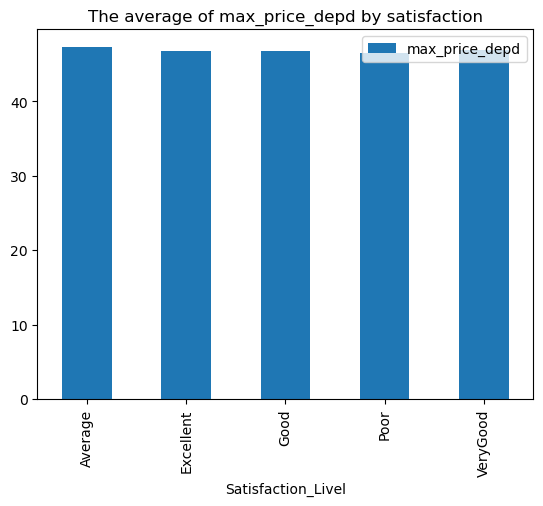

In [70]:
mean_sat.plot(x = 'Satisfaction_Livel', y = 'max_price_depd', kind = 'bar')
plt.title('The average of max_price_depd by satisfaction')

### 2) Read the maximum of ' nb_evaluation' by ‘ driver_status ‘ and show it using a Pie chart

In [71]:
max_eval = pd.pivot_table(df,values = ['nb_evaluation'], index = 'driver_status', aggfunc = np.max).reset_index()
max_eval

,driver_status,nb_evaluation
0,S1,98.0
1,S2,95.0
2,S3,117.0
3,S4,273.0
4,S5,357.0


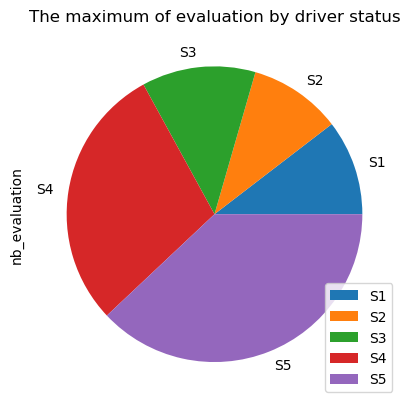

In [72]:
labels = max_eval['driver_status']

max_eval.plot(x = 'driver_status', y = 'nb_evaluation', kind = 'pie', labels = labels)
plt.title('The maximum of evaluation by driver status')
plt.legend(loc = 'lower right')
plt.show()

### 3) Read the “driver_age ” of each driver and show it using the histogram to see five ‘driver-age ranges (0-20, 21-40, 41-60, 61-80, 81-100)

In [73]:
age_range = []

for a in df.loc[:,'driver_age'] :
    if (a > 0) & (a <= 20) :
        age_range.append('0-20')
    elif (a >= 21) & (a <= 40) :
        age_range.append('21-40')
    elif (a >= 41) & (a <= 60) :
        age_range.append('41-60')
    elif (a >= 61) & (a <= 80) :
        age_range.append('61-80')
    elif (a >= 81) & (a <= 100) :
        age_range.append('81-100')


In [74]:
df['age_range'] = age_range

In [75]:
df

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,mean_price_depd,sd_price_depd,seats_in_car,seat_sold,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender,age_range
0,123956.0,427719.0,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28.0,526.0,0.0,...,29.071247,2.567809,4.0,0.0,Francois,Excellent,0.0,25.0,0.0,21-40
1,81617.0,280534.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30.0,526.0,0.0,...,28.862133,3.189145,0.0,0.0,Corinne,Good,24.0,31.0,1.0,21-40
2,198167.0,657605.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31.0,526.0,1.0,...,28.862133,3.189145,0.0,0.0,Laura,Excellent,1.0,31.0,1.0,21-40
3,282817.0,946022.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25.0,526.0,1.0,...,28.862133,3.189145,3.0,3.0,Philippe,VeryGood,3.0,31.0,0.0,21-40
4,29640.0,94886.0,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25.0,526.0,1.0,...,29.364803,2.784098,7.0,4.0,Antoine,VeryGood,10.0,26.0,0.0,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97620,315770.0,1055947.0,Lyon,Paris,506.0,5-Mar-14,3/14/2014 14:30,28.0,834.0,1.0,...,29.938263,3.651275,0.0,0.0,Solange,Good,2.0,49.0,1.0,41-60
97621,324044.0,1089104.0,Lyon,Paris,506.0,13-Mar-14,3/16/2014 17:45,31.0,834.0,0.0,...,29.509066,2.409041,3.0,0.0,Sylvain,Excellent,15.0,44.0,0.0,41-60
97622,175981.0,583045.0,Lyon,Paris,514.0,13-Mar-14,5/4/2014 10:05,37.0,834.0,1.0,...,30.291666,1.710135,4.0,2.0,Jerome,Good,5.0,44.0,0.0,41-60
97623,123163.0,423113.0,Lyon,Paris,528.0,13-Mar-14,4/13/2014 16:00,28.0,834.0,0.0,...,29.428572,3.178965,2.0,0.0,Franck,VeryGood,16.0,27.0,0.0,21-40


In [76]:
drive_age = pd.pivot_table(df, values = ['driver_age'], index = ['age_range'], aggfunc = np.count_nonzero).reset_index()
drive_age

,age_range,driver_age
0,0-20,2605
1,21-40,68991
2,41-60,22635
3,61-80,3331
4,81-100,63


In [77]:
drive_age['age_range'] = drive_age['age_range'].astype(str)
type(drive_age['age_range'])

pandas.core.series.Series

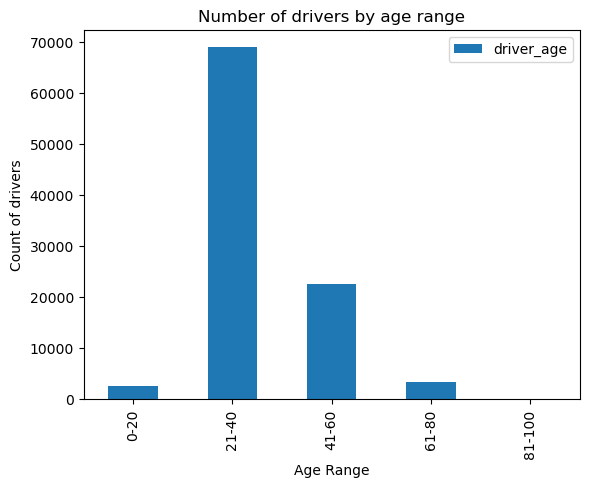

In [78]:
drive_age.plot(x = 'age_range', y ='driver_age', kind = 'bar')
plt.title('Number of drivers by age range')
plt.xlabel('Age Range')
plt.ylabel('Count of drivers')
plt.show()

## b) Data Analysis

### The manager data scientist of BlaBlaCar asks you to publish: the Top Five BlaBlaCar_Index driver with (Driver_id, Driver_first_name, driver_status, Business_Index, Confort_Index)

( BlaBlaCar_Index) per Driver_id = { ( Business_Index ) / (1+ Confort_Index) } per Driver_id

Business_Index Value = Total (trip Distance * mean_price_depd) per Driver_id

Confort_Index Value = Total ( 3 + car_rating + detour_time + music - smoking) per Driver_i

In [79]:
pvt = df.pivot_table(values = ['trip_distance','mean_price_depd'], index = 'driver_id', aggfunc = sum)
pvt['Business_Index']= pvt['mean_price_depd'] * pvt['trip_distance']
pvt

,mean_price_depd,trip_distance,Business_Index
driver_id,,,
10.0,29.266666,462.0,13521.199692
19.0,118.075205,1926.0,227412.844830
75.0,31.129770,462.0,14381.953740
77.0,30.206667,505.0,15254.366835
78.0,31.129770,704.0,21915.358080
...,...,...,...
354813.0,57.120804,952.0,54379.005408
354834.0,30.661152,484.0,14839.997568
354867.0,60.765351,925.0,56207.949675


In [80]:
un = df['driver_id'].unique()
un

array([123956.,  81617., 198167., ..., 250984., 315770., 175981.])

In [81]:
for d in un:
    driver = df[df['driver_id'] == d]
    business_index_value = driver['trip_distance'].sum() * driver['mean_price_depd'].mean()
    confort_index_value = 3 + driver['car_rating'].mean() + driver['detour_time'].mean() + driver['music'].mean()-driver['smoking'].mean()
    
    df.loc[df['driver_id'] == d, 'business_index'] = business_index_value
    df.loc[df['driver_id'] == d, 'confort_index'] = confort_index_value

In [82]:
for d in un:
    driver = df[df['driver_id'] == d]

    blablacar_index = driver['business_index'] / (1+driver['confort_index'])

    df.loc[df['driver_id'] == d, 'blablacar_index'] = blablacar_index

In [83]:
df

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,seat_sold,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender,age_range,business_index,confort_index,blablacar_index
0,123956.0,427719.0,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28.0,526.0,0.0,...,0.0,Francois,Excellent,0.0,25.0,0.0,21-40,80246.560408,20.500000,3732.398158
1,81617.0,280534.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30.0,526.0,0.0,...,0.0,Corinne,Good,24.0,31.0,1.0,21-40,12381.855057,21.000000,562.811594
2,198167.0,657605.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31.0,526.0,1.0,...,0.0,Laura,Excellent,1.0,31.0,1.0,21-40,39567.386690,16.666667,2239.663398
3,282817.0,946022.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25.0,526.0,1.0,...,3.0,Philippe,VeryGood,3.0,31.0,0.0,21-40,26692.932192,21.500000,1186.352542
4,29640.0,94886.0,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25.0,526.0,1.0,...,4.0,Antoine,VeryGood,10.0,26.0,0.0,21-40,52248.749767,13.750000,3542.288120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97620,315770.0,1055947.0,Lyon,Paris,506.0,5-Mar-14,3/14/2014 14:30,28.0,834.0,1.0,...,0.0,Solange,Good,2.0,49.0,1.0,41-60,15148.761078,20.000000,721.369575
97621,324044.0,1089104.0,Lyon,Paris,506.0,13-Mar-14,3/16/2014 17:45,31.0,834.0,0.0,...,0.0,Sylvain,Excellent,15.0,44.0,0.0,41-60,56188.168036,7.000000,7023.521005
97622,175981.0,583045.0,Lyon,Paris,514.0,13-Mar-14,5/4/2014 10:05,37.0,834.0,1.0,...,2.0,Jerome,Good,5.0,44.0,0.0,41-60,15569.916324,21.000000,707.723469
97623,123163.0,423113.0,Lyon,Paris,528.0,13-Mar-14,4/13/2014 16:00,28.0,834.0,0.0,...,0.0,Franck,VeryGood,16.0,27.0,0.0,21-40,83236.851562,6.200000,11560.673828


In [84]:
top = pd.pivot_table(df,values = ['Driver_first_name','driver_status','business_index','confort_index','blablacar_index'], index = 'driver_id', aggfunc = max).sort_values(by = 'blablacar_index',ascending = False)
top = top.reset_index()
top.head(5)

,driver_id,Driver_first_name,blablacar_index,business_index,confort_index,driver_status
0,305080.0,Samidil,355619.210793,1.422477e+06,3.000000,S1
1,293799.0,Remy,141401.916236,8.186427e+05,4.789474,S4
2,253409.0,Mohamed,140850.866000,1.126807e+06,7.000000,S2
3,308156.0,Saphir,116041.770840,9.532003e+05,7.214286,S5
4,115650.0,Farid,113376.266388,5.668813e+05,4.000000,S3


# Question 3 : Machine Learning Algorithm

## a) Supervised Machine Learning

### Conduct and Interpret a Logistic Regression
### Write the resulting logistic regression equation for model1 below:
### Predicted logit [' Recommendation' ] = (1 ,0)] = [ Yes, or Non ]
### Independent Variable ( X ) = (‘music’,‘talk’, ‘pet’, ‘smoking’, ‘detour_time')
### Interpret a « Logit Regression Results » (10 lines max)

In [85]:
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [86]:
df.columns

Index(['driver_id', 'offer_id', 'departure', 'arrival', 'trip_distance',
       'offer_date', 'departure_date', 'price', 'nb_offers', 'photo',
       'driver_status', 'music', 'talk', 'pet', 'smoking',
       'manual_reservation', 'round_trip', 'car_rating', 'detour_time',
       'page_view', 'max_price_depd', 'min_price_depd', 'mean_price_depd',
       'sd_price_depd', 'seats_in_car', 'seat_sold', 'Driver_first_name',
       'Satisfaction_Livel', 'nb_evaluation', 'driver_age', 'driver_gender',
       'age_range', 'business_index', 'confort_index', 'blablacar_index'],
      dtype='object')

In [87]:
#create a column 'Recommendation' based on 'Satisfaction'.
# if 'Satisfaction' =  Excellent, Good and Very Good then Satisfaction = 1 else 'Satisfaction' = Average and Poor then 0.

In [88]:
df['Satisfaction_Livel'].unique()

array(['Excellent', 'Good', 'VeryGood', 'Average', 'Poor'], dtype=object)

In [89]:
recommendations = []
for i, row in df.iterrows():
    if row['Satisfaction_Livel'] in ['Poor', 'Average']:
        recommendations.append(0)
    else:
        recommendations.append(1)
df['Recommendation'] = recommendations

In [106]:
df[['music', 'talk', 'pet', 'smoking', 'detour_time']]

,music,talk,pet,smoking,detour_time
0,0.0,1,0.0,0.0,15.0
1,1.0,1,0.0,0.0,15.0
2,1.0,1,0.0,0.0,15.0
3,1.0,1,0.0,0.0,15.0
4,1.0,1,0.0,0.0,0.0
...,...,...,...,...,...
97620,1.0,1,1.0,1.0,15.0
97621,1.0,1,0.0,0.0,0.0
97622,0.0,1,0.0,0.0,15.0
97623,1.0,1,0.0,0.0,0.0


In [91]:
X = df[['music', 'talk', 'pet', 'smoking', 'detour_time']]
y = df['Recommendation']

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [93]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

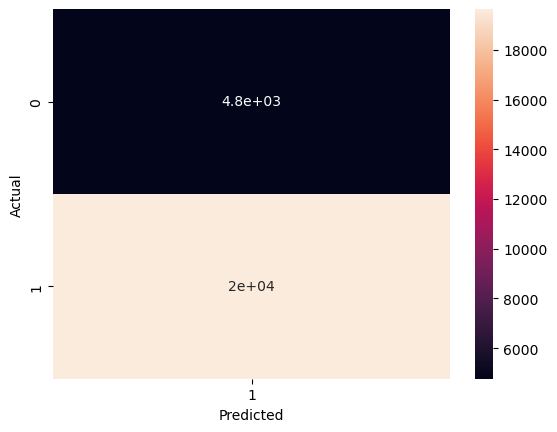

In [107]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [108]:
print(confusion_matrix)

Predicted      1
Actual          
0           4769
1          19638


In [95]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8046052362027287


In [96]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Intercept: \n', logistic_regression.intercept_)
print('Coefficients: \n', logistic_regression.coef_)

Intercept: 
 [0.69383671]
Coefficients: 
 [[ 0.01969098  0.69147295 -0.02684069 -0.04742796  0.00081856]]


In [97]:
X= sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.496865
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Recommendation   No. Observations:                97625
Model:                          Logit   Df Residuals:                    97620
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:               4.859e-05
Time:                        22:07:16   Log-Likelihood:                -48506.
converged:                       True   LL-Null:                       -48509.
Covariance Type:            nonrobust   LLR p-value:                    0.3179
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
music           0.0246      0.017      1.478      0.139      -0.008       0.057
talk            1.3841    

## b) Unsupervised Machine Learning

### Using Scikit-Learn for optimal value of k in KMeans, conduct the cluster analysis:
### Variables: == [‘trip_distance], & [‘mean_price_depd’]
### Cluster Number == (n_ optimal value )
### Using the “describe Statistics” function and make general commentary for each cluster (10 lines max)

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [99]:
dfv = df[['trip_distance','mean_price_depd']]
dfv

,trip_distance,mean_price_depd
0,425.0,29.071247
1,429.0,28.862133
2,429.0,28.862133
3,429.0,28.862133
4,435.0,29.364803
...,...,...
97620,506.0,29.938263
97621,506.0,29.509066
97622,514.0,30.291666
97623,528.0,29.428572


In [100]:
elbow = []
for i in range(1,10):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=40)
    k_means.fit(dfv)
    elbow.append(k_means.inertia_)

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

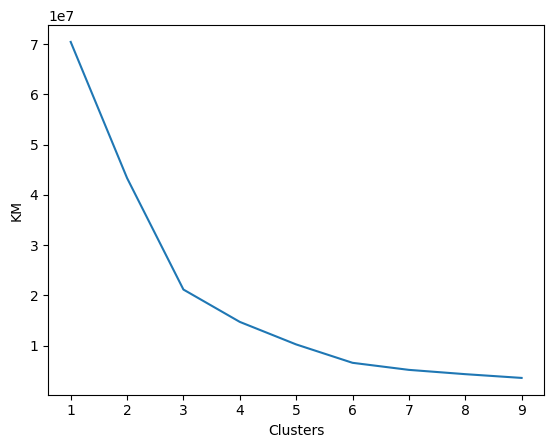

In [101]:
plt.plot(np.arange(1,10),elbow)
plt.xlabel('Clusters')
plt.ylabel('KM')
plt.show()

In [102]:
km_sample = KMeans(n_clusters = 3)
km_sample.fit(dfv)

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [103]:
dfv['clusters'] = km_sample.fit_predict(dfv)
dfv

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_17208\1734742909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv['clusters'] = km_sample.fit_predict(dfv)


,trip_distance,mean_price_depd,clusters
0,425.0,29.071247,0
1,429.0,28.862133,0
2,429.0,28.862133,0
3,429.0,28.862133,0
4,435.0,29.364803,0
...,...,...,...
97620,506.0,29.938263,2
97621,506.0,29.509066,2
97622,514.0,30.291666,2
97623,528.0,29.428572,2


C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


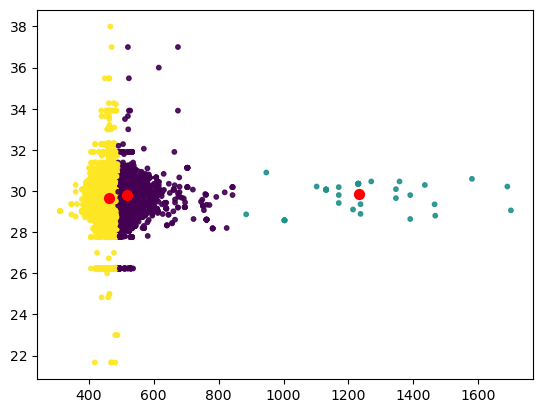

In [104]:
kmeans = KMeans(n_clusters=3).fit(dfv)
centroids = kmeans.cluster_centers_

plt.scatter(df['trip_distance'], df['mean_price_depd'], c= kmeans.labels_.astype(int), s=10, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50);

In [105]:
grouped_data = dfv.groupby('clusters').describe()
grouped_data

trip_distance                                                  \
                 count         mean         std    min     25%     50%   
clusters                                                                 
0              88873.0   462.452510   11.561221  312.0   462.0   462.0   
1                 44.0  1230.840909  174.841183  885.0  1131.0  1230.0   
2               8708.0   517.029628   30.161973  490.0   498.0   512.0   

                         mean_price_depd                                  \
             75%     max           count       mean       std        min   
clusters                                                                   
0          467.0   489.0         88873.0  29.669590  0.678378  21.666666   
1         1289.0  1700.0            44.0  29.840463  0.665501  28.578358   
2          524.0   843.0          8708.0  29.794328  0.679226  26.237301   

                                                      
                25%        50%        75%        max  
clusters                                              
0         29.265249  29.712908  30.081282  38.000000  
1         29.360439  30.070442  30.354015  30.900524  
2         29.400745  29.816608  30.206667  37.000000